# PRCP-1011-BloodDonaPred

### Problem Statement

##### Blood banks constantly face the challenge of maintaining an adequate blood supply to meet the needs of hospitals and patients, especially during emergencies. This is where Machine Learning can play a key role. By using predictive models, blood banks can optimize inventory management, plan effective campaigns, and ensure a steady blood supply.

    

### 1.Importing Libraries

In [5]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Classification models
from sklearn.metrics import accuracy_score

# Importing LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Importing XGBClassifier
from xgboost import XGBClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

#Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV



### 2.Importing Data

In [7]:
#loading the data using pandas
data=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### 3.Domain Analysis

##### 1.Unnamed: 0: This column is not important in prediction, so we can ignore this.
##### 2.Months since Last Donation: This column tells the number of months since the donor's most recent donation.##### 3.Number of Donation: This is the total amount of blood that the donar has donated.
##### 4.Total Volume Donated: This column holds the total volume of blood donated from the donar.
##### 5.Months since First Donation: Here we can know the number of months since the donar's first donation.
##### 6.Made Donation in March 2007: This will let us know wheather the person he/she donated blood in March 2007(holds a binary value:0-stands for blood not donated,1-stands for blood donated).


### 4.Basic Checks

In [11]:
# checking the first five rows of the data
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [12]:
#checking the last five rows of the data
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [13]:
#checking the number of columns and rows in the data
data.shape

(576, 6)

##### Insight: This data has 576 rows and 6 columns.

In [15]:
#checking the names of the column in the data
data.columns 

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

##### Insight: As mentioned earlier the column 'Unnamed: 0' has no significant effect in prediction, so we can drop that column.

In [17]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [18]:
#sucessfully dropped the Unnamed: 0 column

In [19]:
#checking the unique values in each column
for i in data:
    print(i)
    print(data[i].unique())
    print(f'The number of unique values in {i}: {len(data[i].unique())}')
    print(' ')

Months since Last Donation
[ 2  0  1  4  5  3 12  6 11  9 10 13 14  8  7 16 23 21 18 22 26 35 74 15
 20 17 25 39 72]
The number of unique values in Months since Last Donation: 29
 
Number of Donations
[50 13 16 20 24  4  7 12 46  3 10  6  5 14 15 11  8  9  2 19 17  1 22 18
 38 43 44 21 33]
The number of unique values in Number of Donations: 29
 
Total Volume Donated (c.c.)
[12500  3250  4000  5000  6000  1000  1750  3000 11500   750  2500  1500
  1250  3500  3750  2750  2000  2250   500  4750  4250   250  5500  4500
  9500 10750 11000  5250  8250]
The number of unique values in Total Volume Donated (c.c.): 29
 
Months since First Donation
[98 28 35 45 77  4 14 47 15 11 48 49 16 40 21 58 64 22 53 69 36  2 46 26
 74 25 51 71 23 86 38 34 70 59 82 61 57 79 41 33 10 88 19 37  9 52 76 27
 24 39 63 43 75 73 78 50 60 29 17 72 30 89 87 93 95 83 12 32 18 55  3 13
 62 54 31]
The number of unique values in Months since First Donation: 75
 
Made Donation in March 2007
[1 0]
The number of unique val

In [20]:
#checking the count of unique values 
for i in data:
    print(data[i].value_counts())

Months since Last Donation
2     140
4     115
14     60
11     60
16     48
21     37
23     36
9      17
3      10
1       9
8       5
7       5
12      5
13      4
0       4
6       4
10      3
5       2
18      2
20      1
39      1
25      1
17      1
26      1
15      1
74      1
35      1
22      1
72      1
Name: count, dtype: int64
Number of Donations
1     118
2      85
3      68
5      53
4      49
6      42
7      32
8      27
9      20
11     16
10     11
12      9
16      8
14      8
13      7
17      4
15      3
19      2
24      2
20      2
22      2
43      1
21      1
44      1
50      1
38      1
18      1
46      1
33      1
Name: count, dtype: int64
Total Volume Donated (c.c.)
250      118
500       85
750       68
1250      53
1000      49
1500      42
1750      32
2000      27
2250      20
2750      16
2500      11
3000       9
4000       8
3500       8
3250       7
4250       4
3750       3
4750       2
6000       2
5000       2
5500       2
10750      1
5250   

In [21]:
#checking a concise summary of a data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   576 non-null    int64
 1   Number of Donations          576 non-null    int64
 2   Total Volume Donated (c.c.)  576 non-null    int64
 3   Months since First Donation  576 non-null    int64
 4   Made Donation in March 2007  576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


##### Insight: All are Numerical Values.

In [23]:
#To check the descriptive statistics of a data
data.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


### 5.EDA

In [25]:
#creating profile report
data_report=ProfileReport(data,title='Blood Donation Report',explorative=False)
data_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 5.1 Univariate Analysis

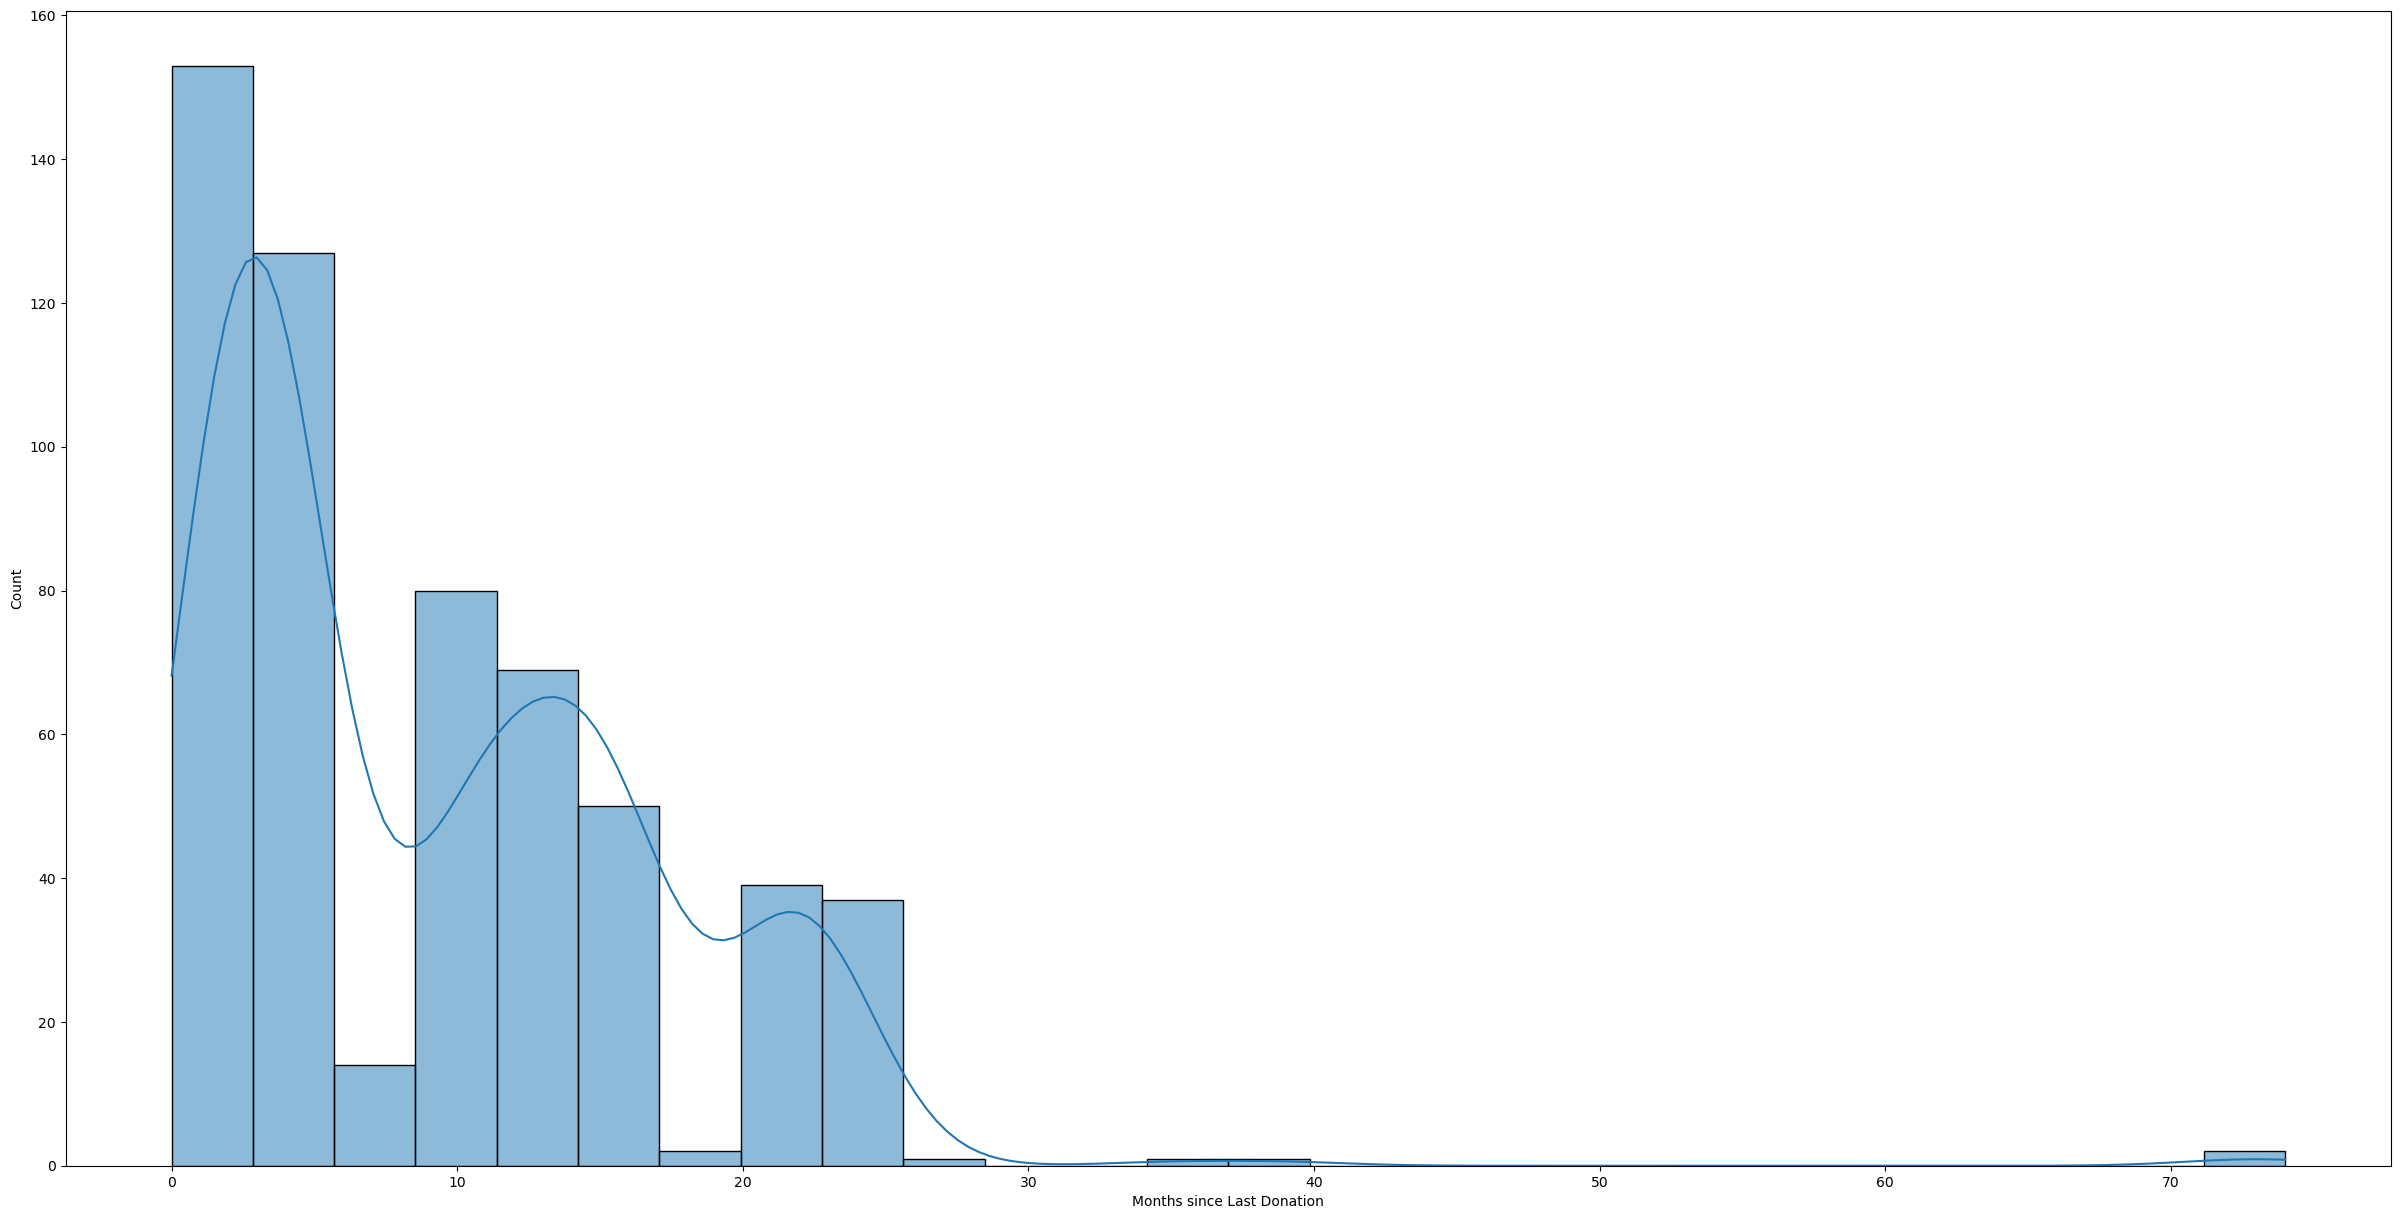

In [27]:
#examining a single variable
plt.figure(figsize=(30,15))
sns.histplot(data,x='Months since Last Donation',kde=True)
plt.show()

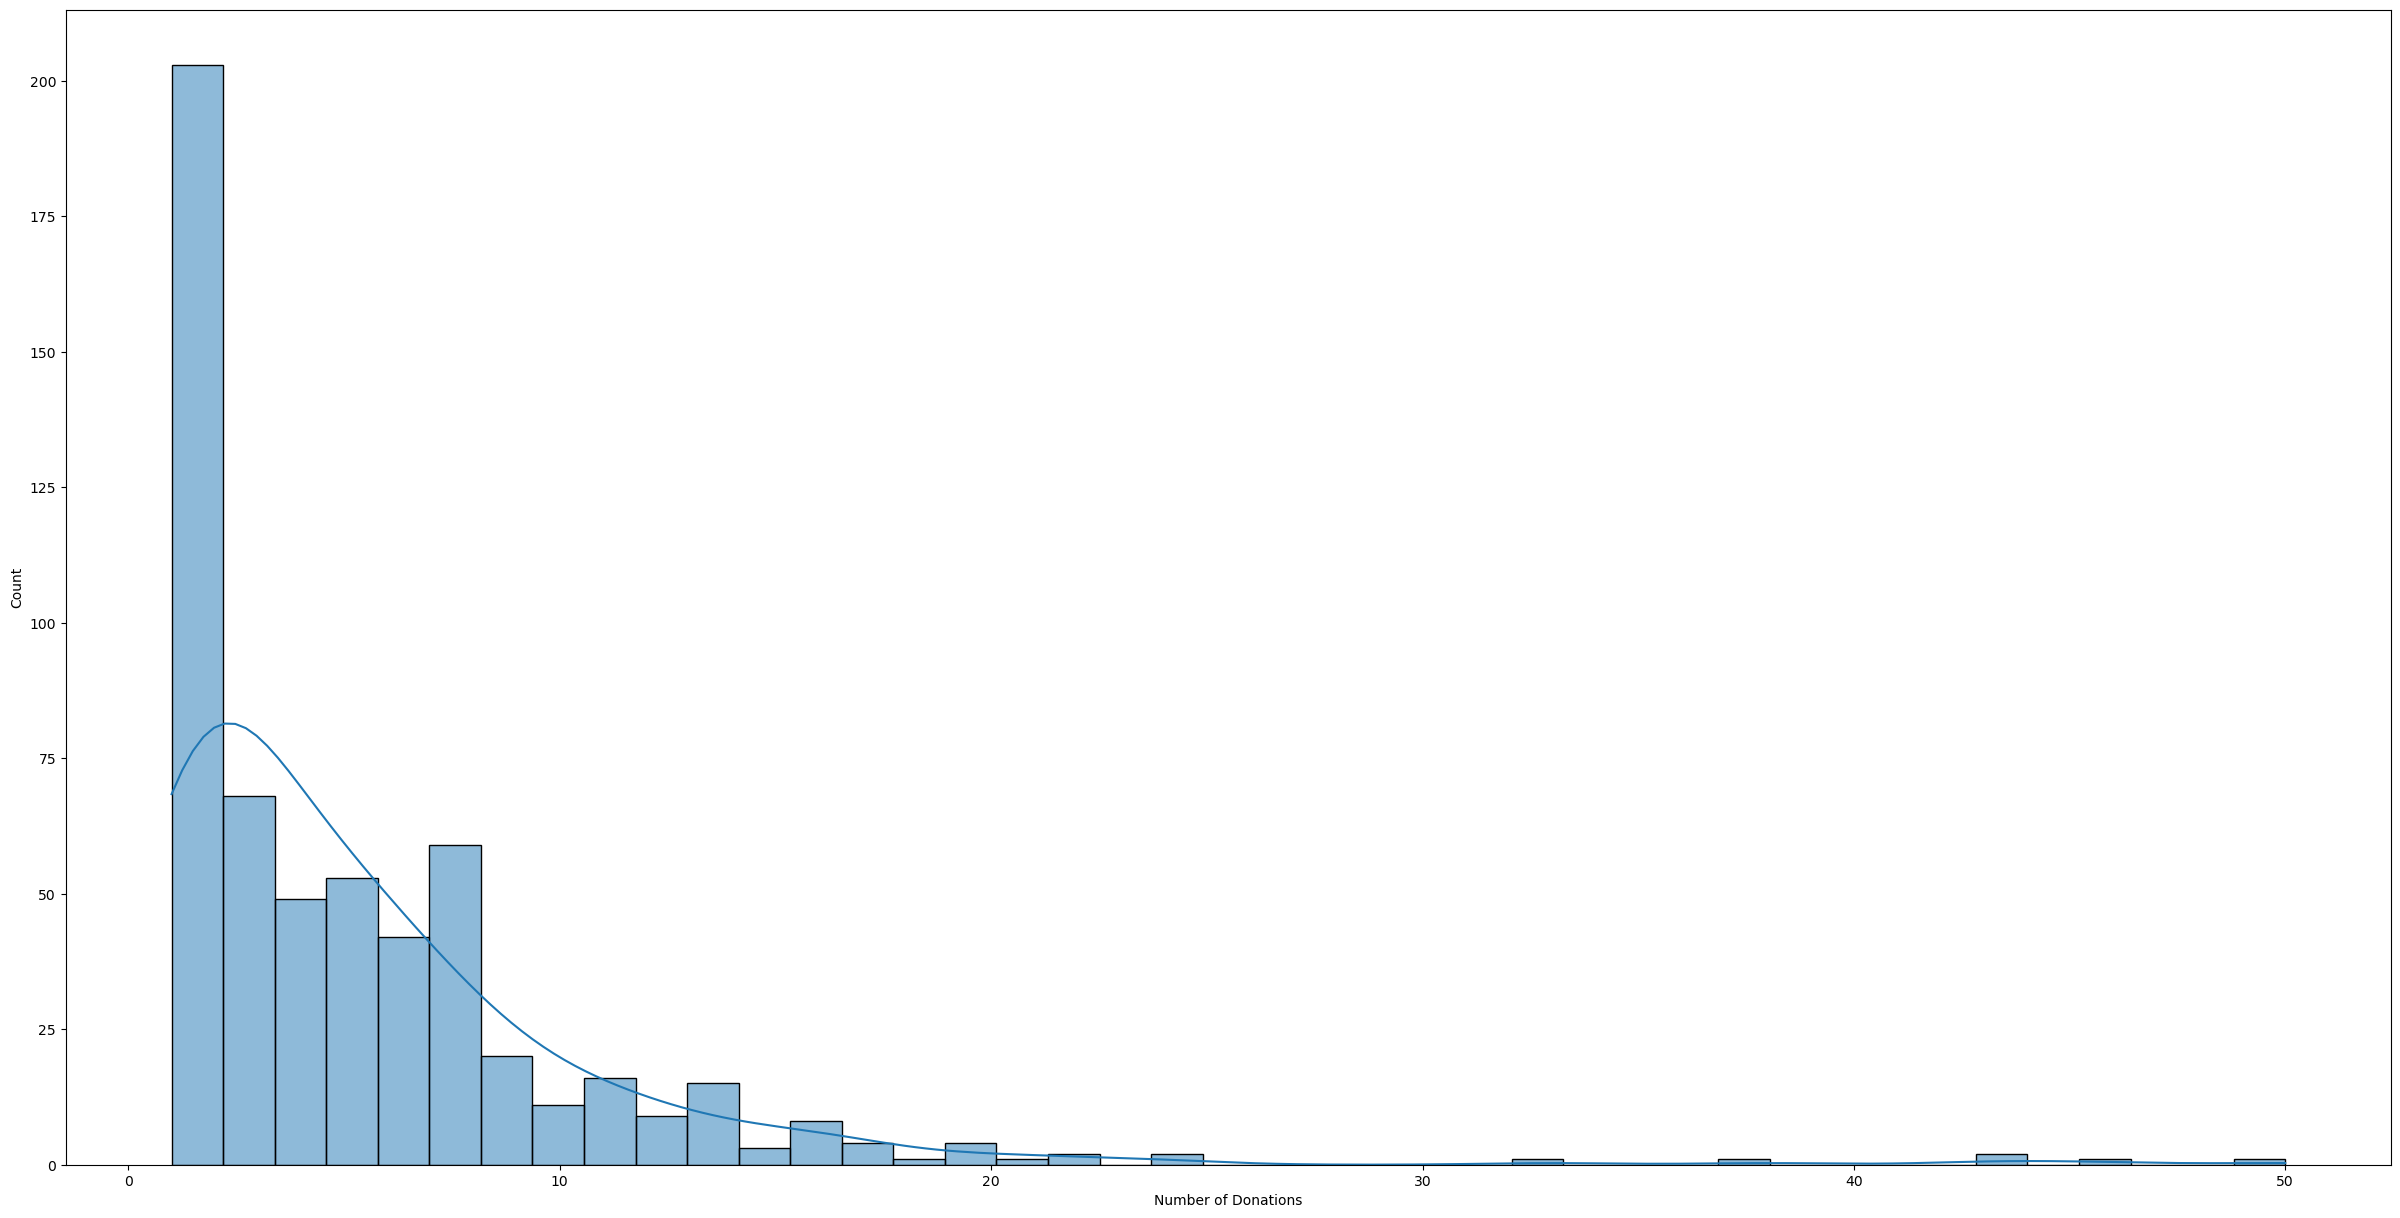

In [28]:
plt.figure(figsize=(30,15))
sns.histplot(data,x='Number of Donations',kde=True)
plt.show()
           

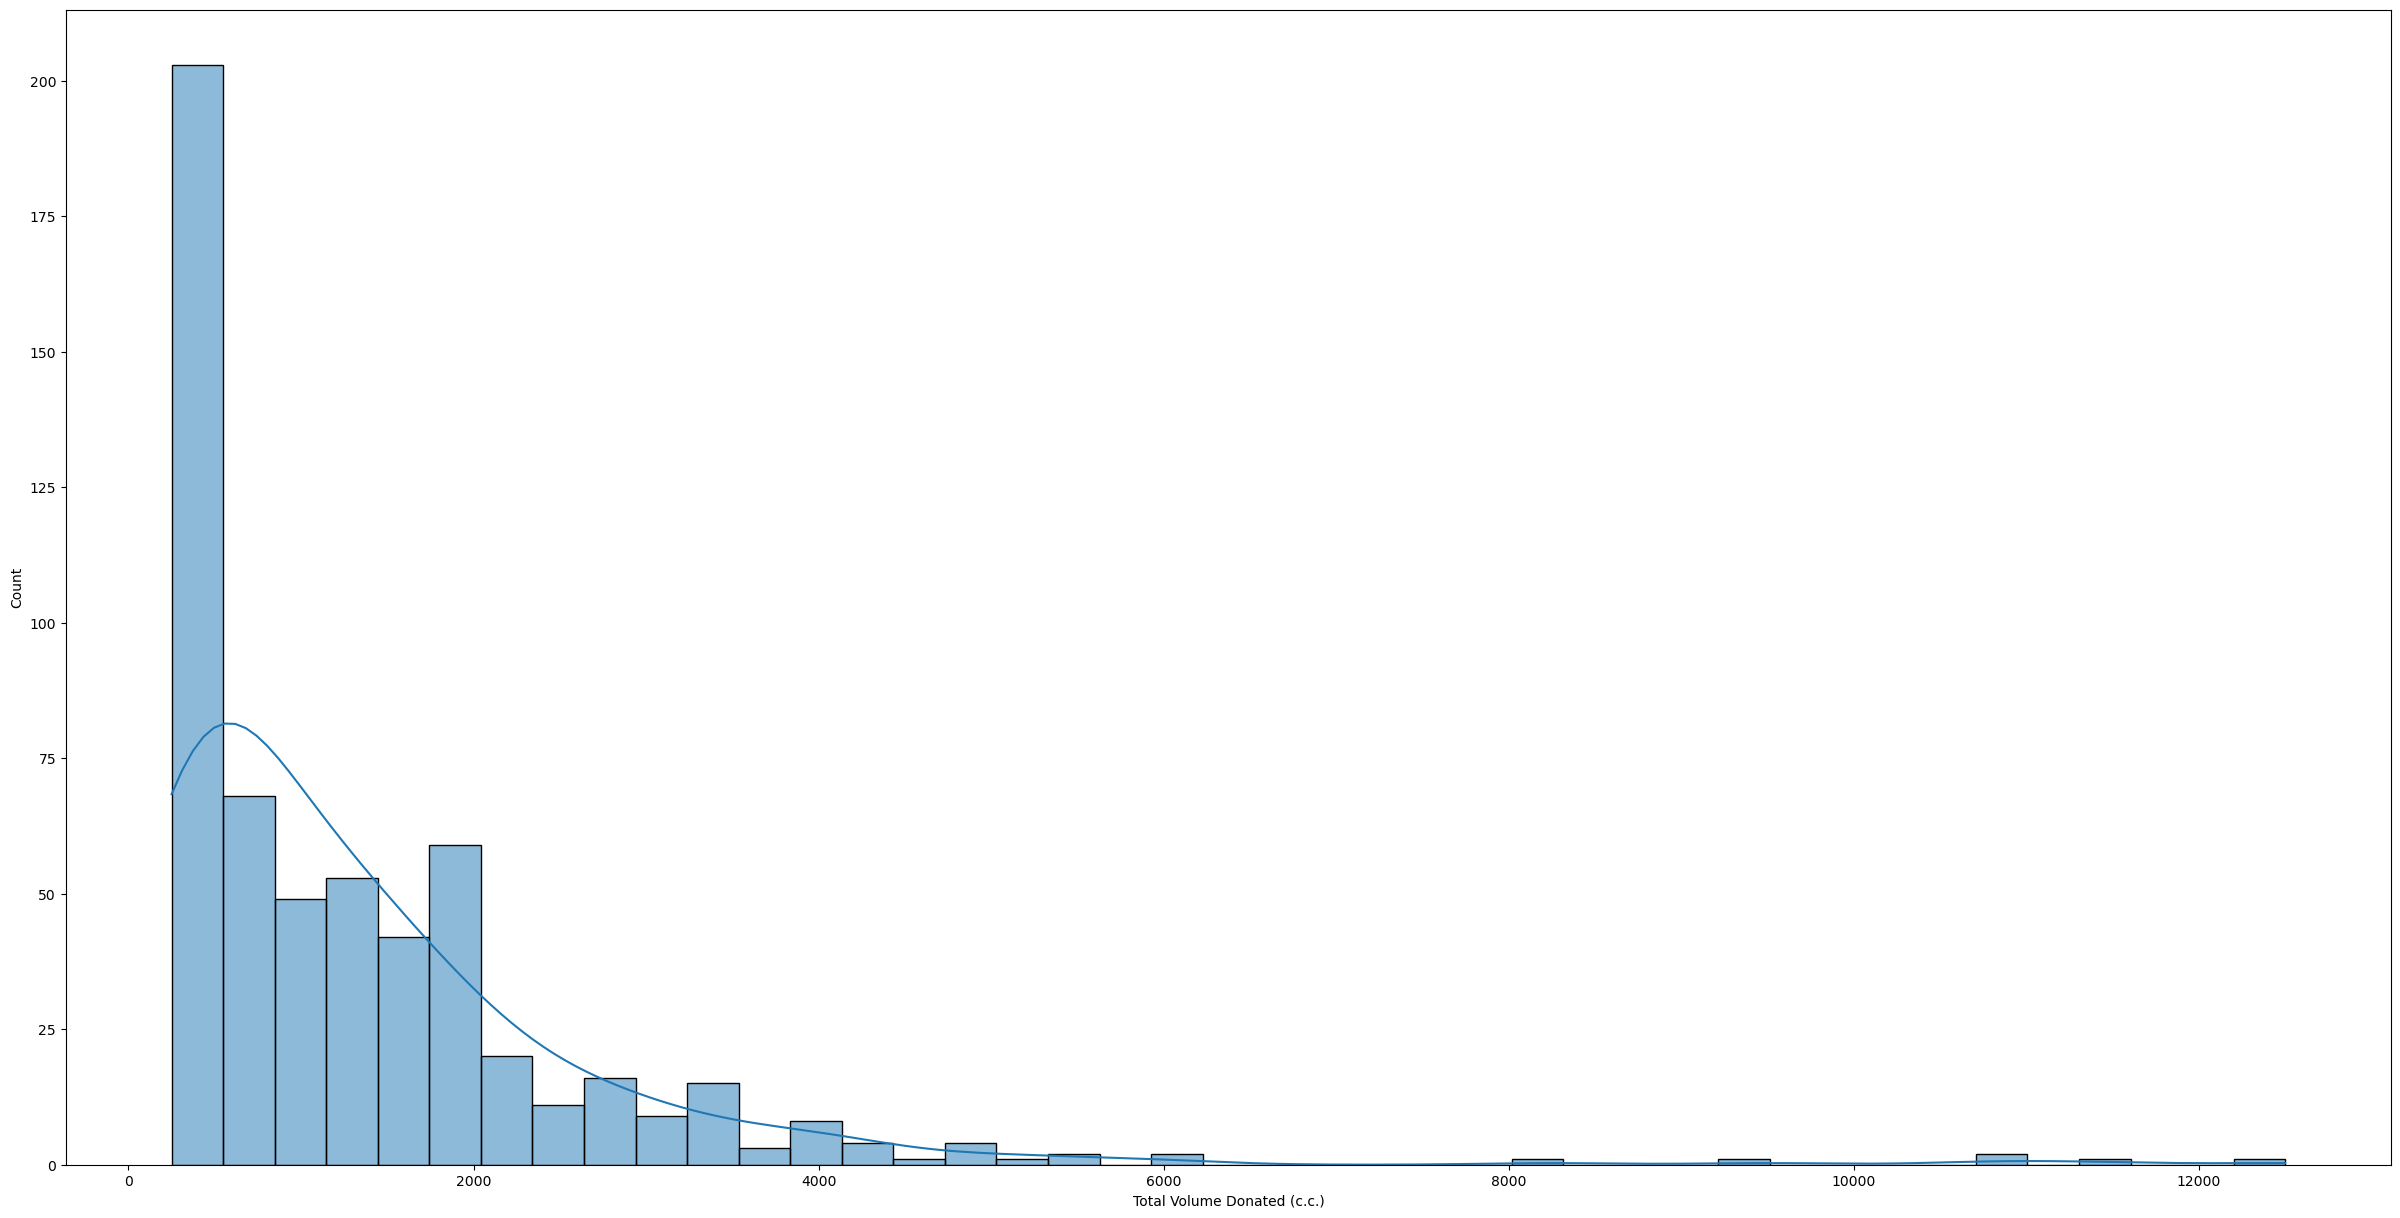

In [29]:
plt.figure(figsize=(30,15))
sns.histplot(data,x='Total Volume Donated (c.c.)',kde=True)
plt.show()
           

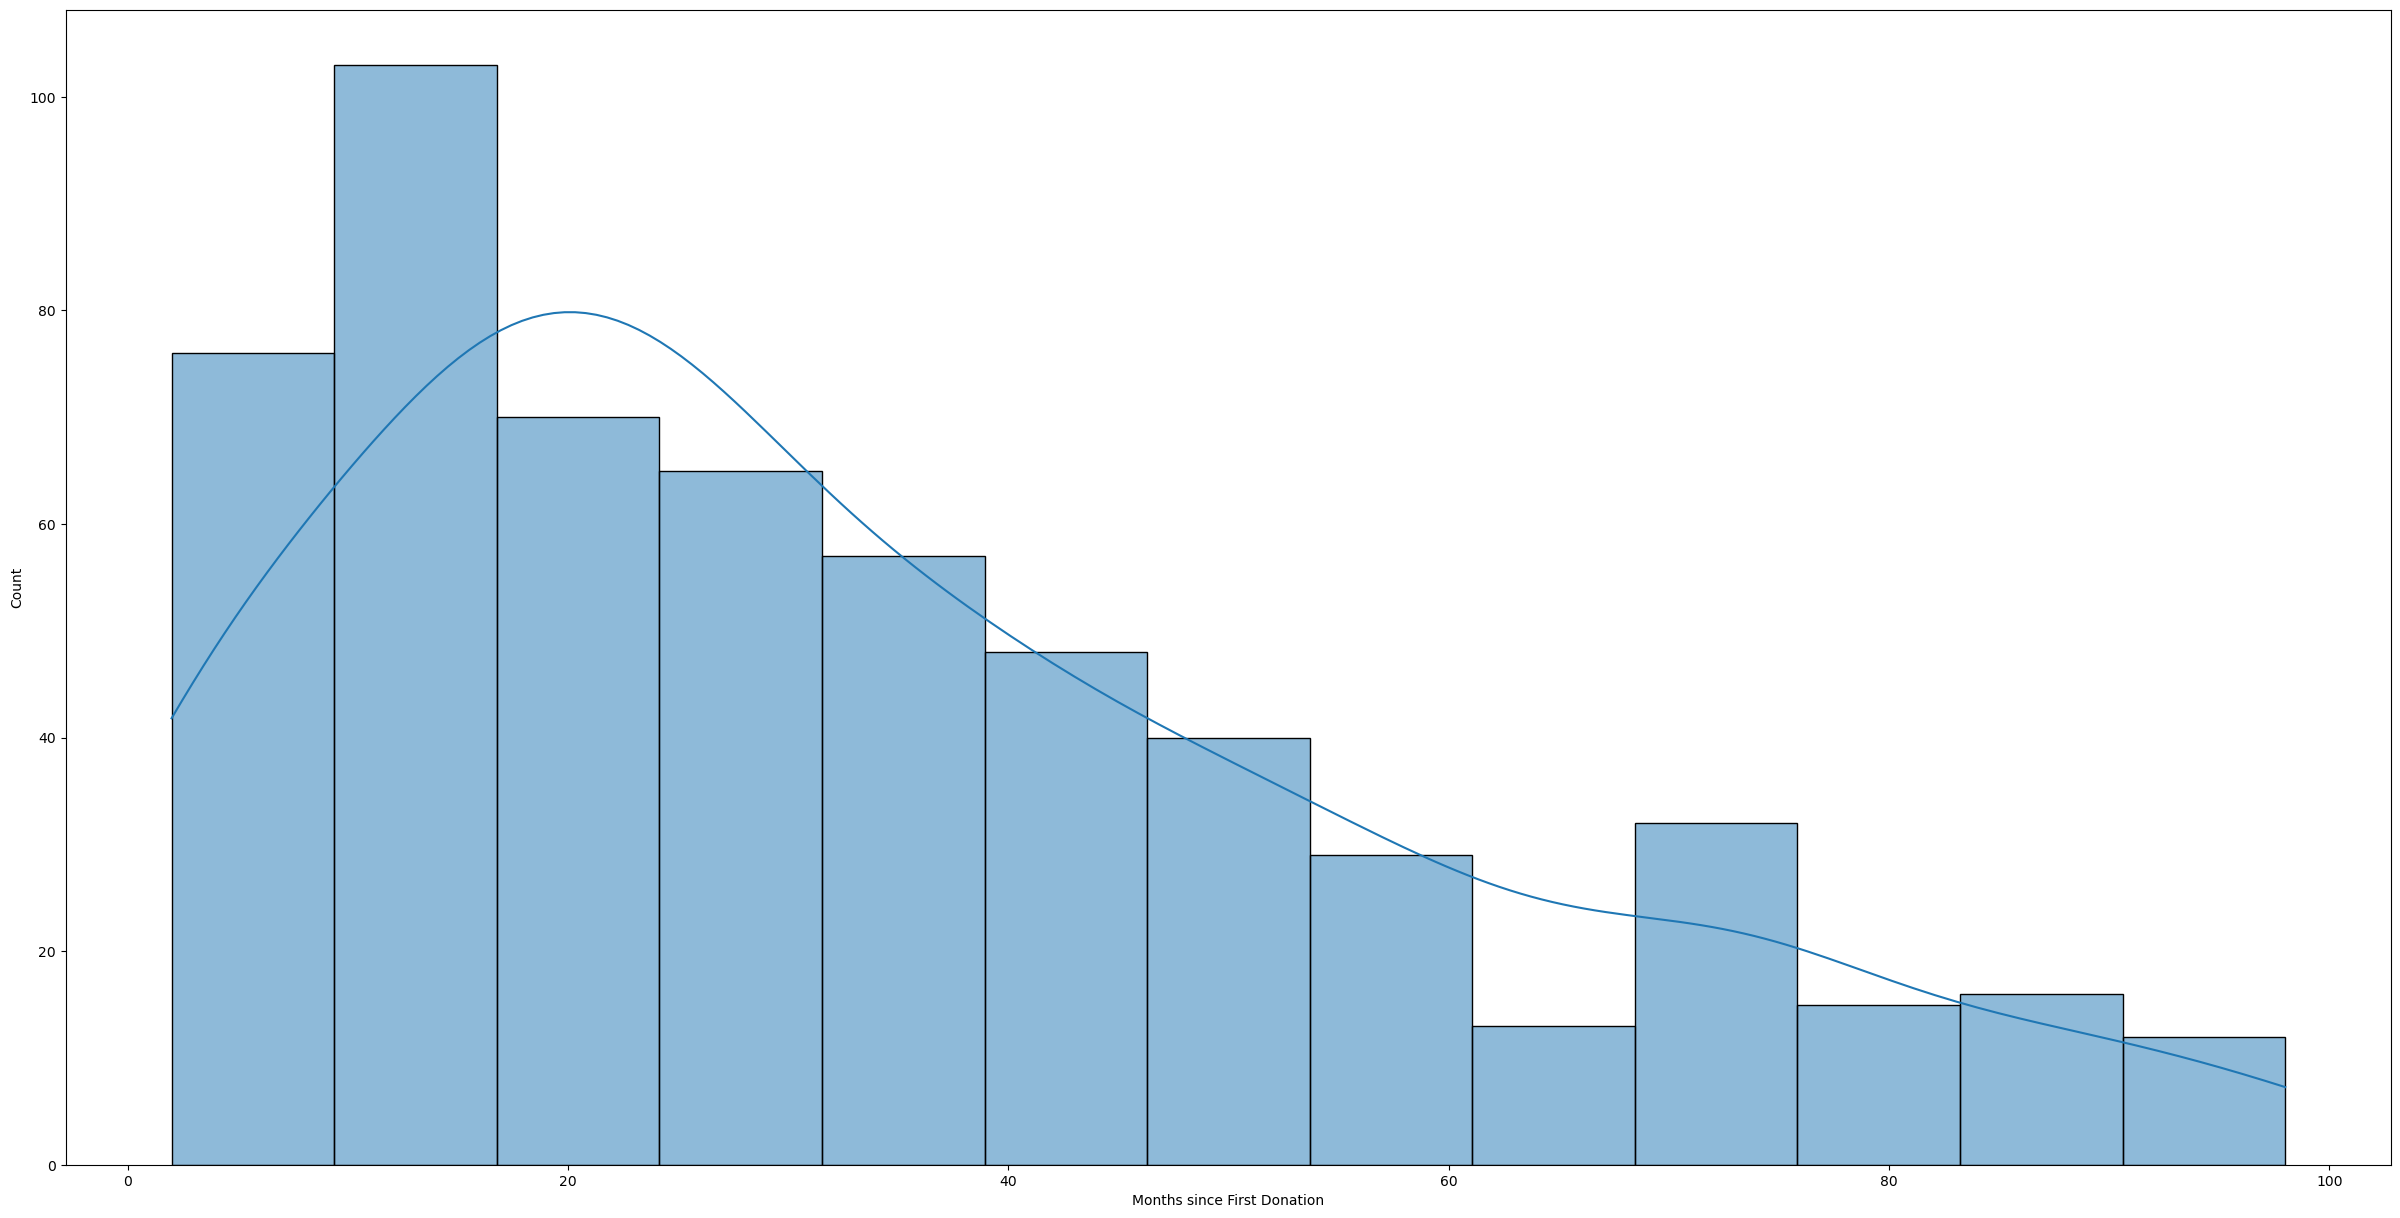

In [30]:
plt.figure(figsize=(30,15))
sns.histplot(data,x='Months since First Donation',kde=True)
plt.show()
           

#### 5.2 Bivariate Analysis

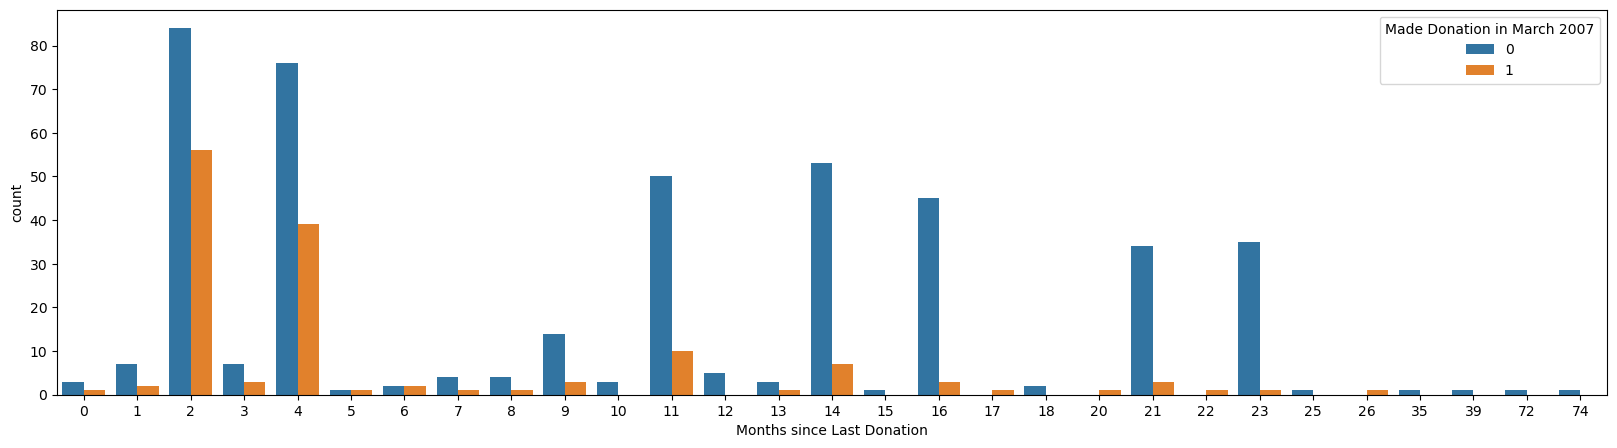

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(x='Months since Last Donation',hue='Made Donation in March 2007',data=data)
plt.show()

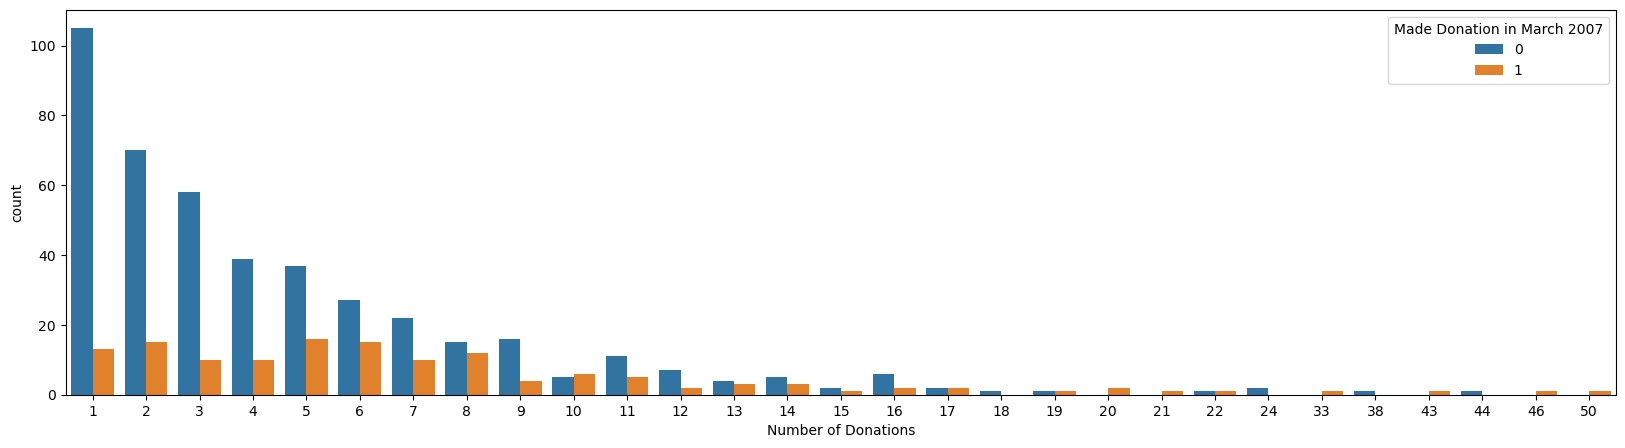

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(x='Number of Donations',hue='Made Donation in March 2007',data=data)
plt.show()

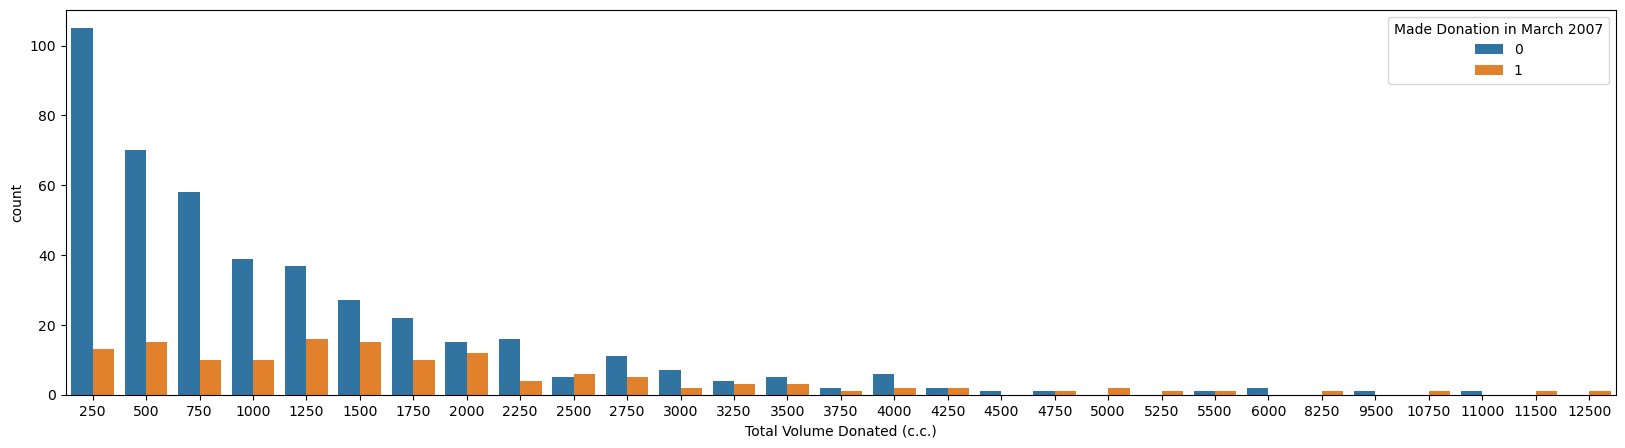

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(x='Total Volume Donated (c.c.)',hue='Made Donation in March 2007',data=data)
plt.show()

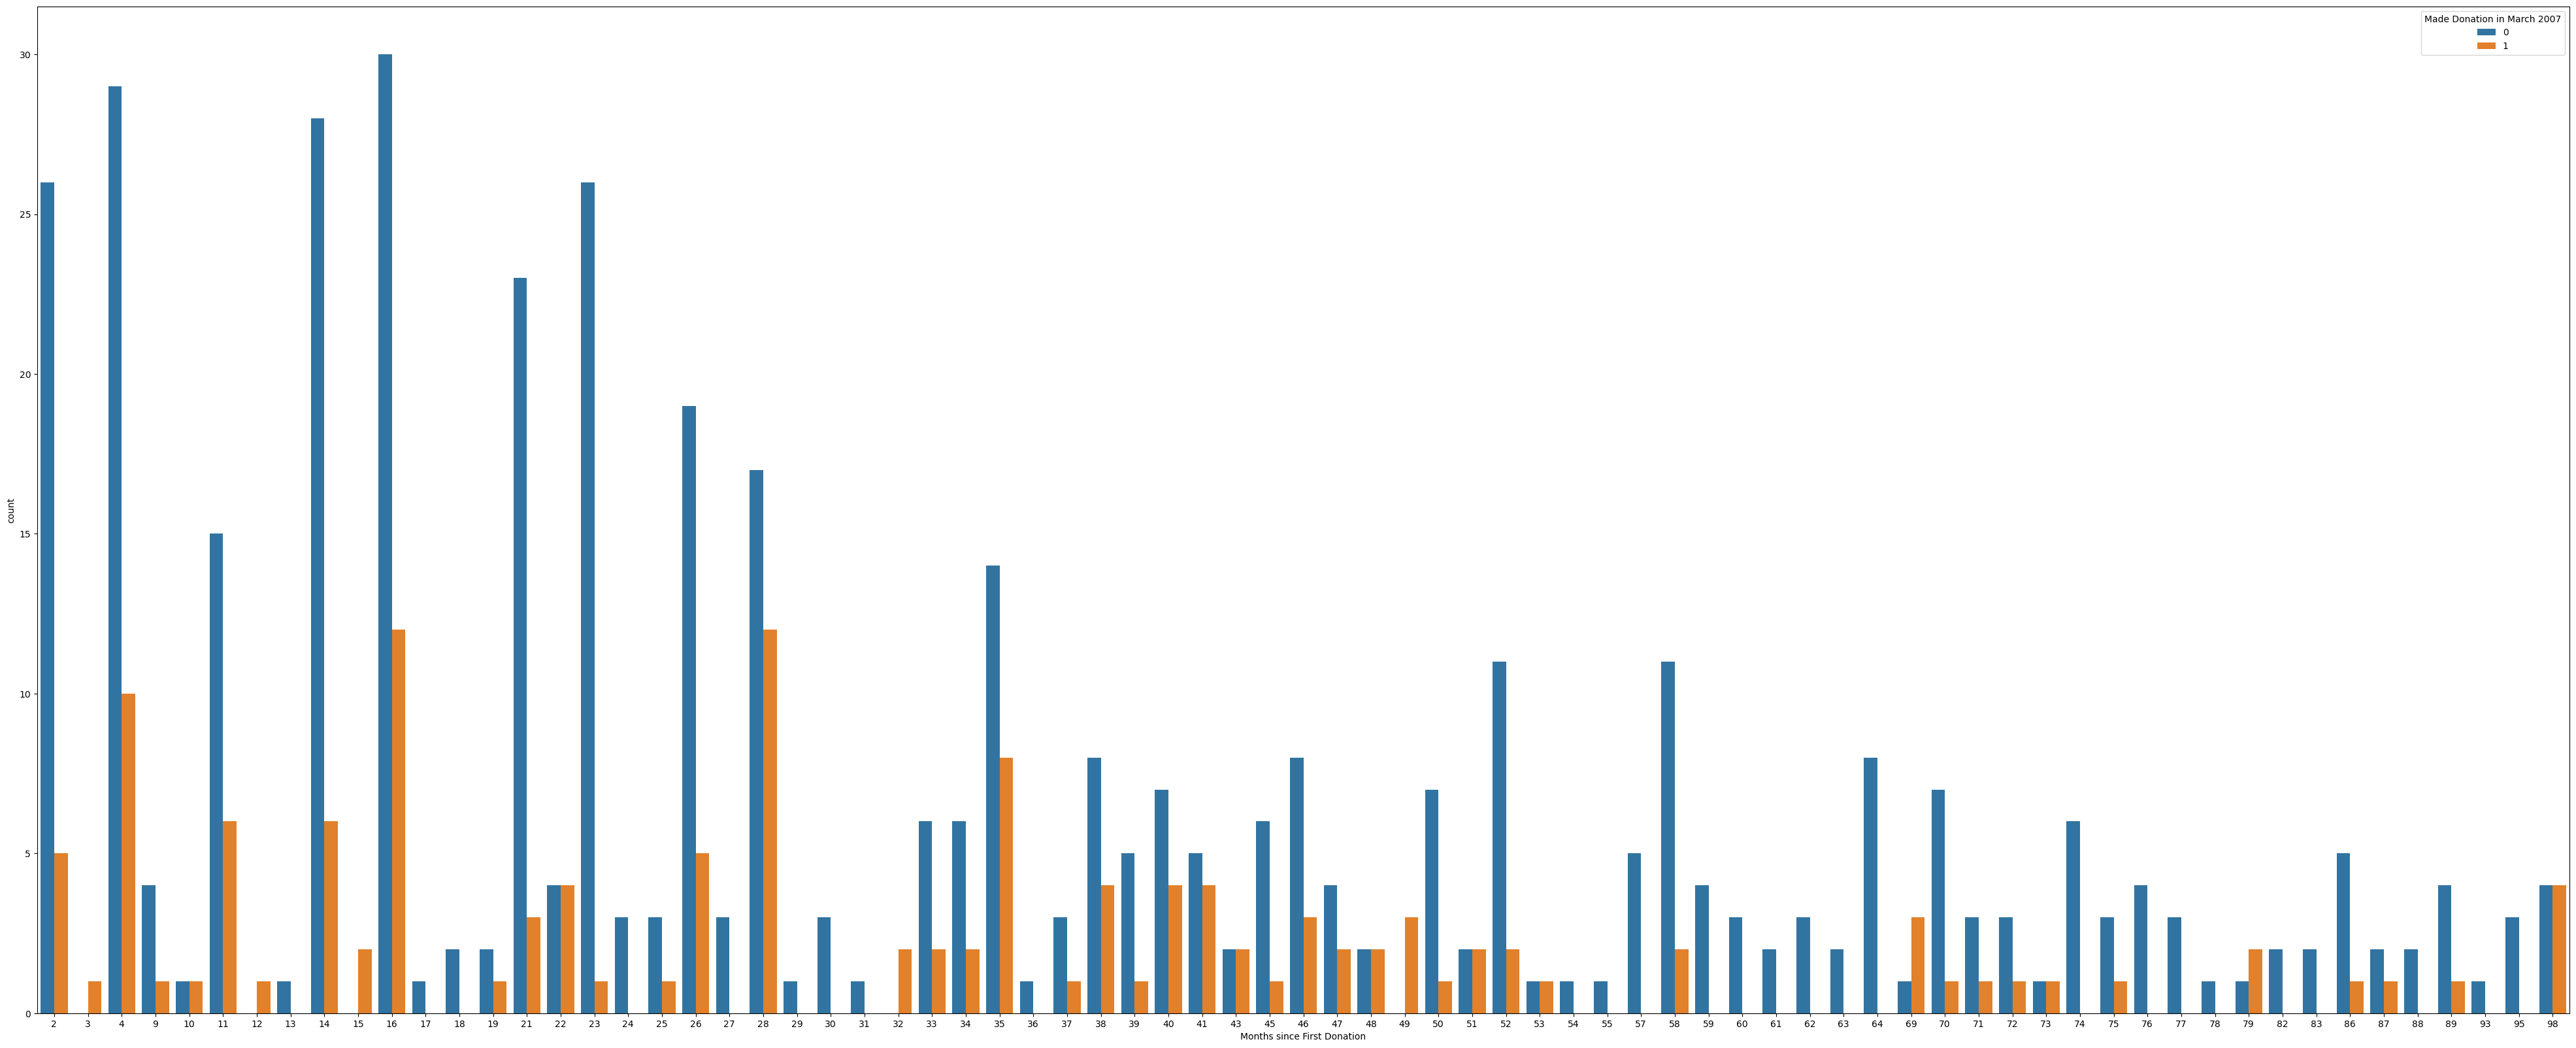

In [35]:
plt.figure(figsize=(50,20))
sns.countplot(x='Months since First Donation',hue='Made Donation in March 2007',data=data)
plt.show()

#### 5.3 Multivariate Analysis

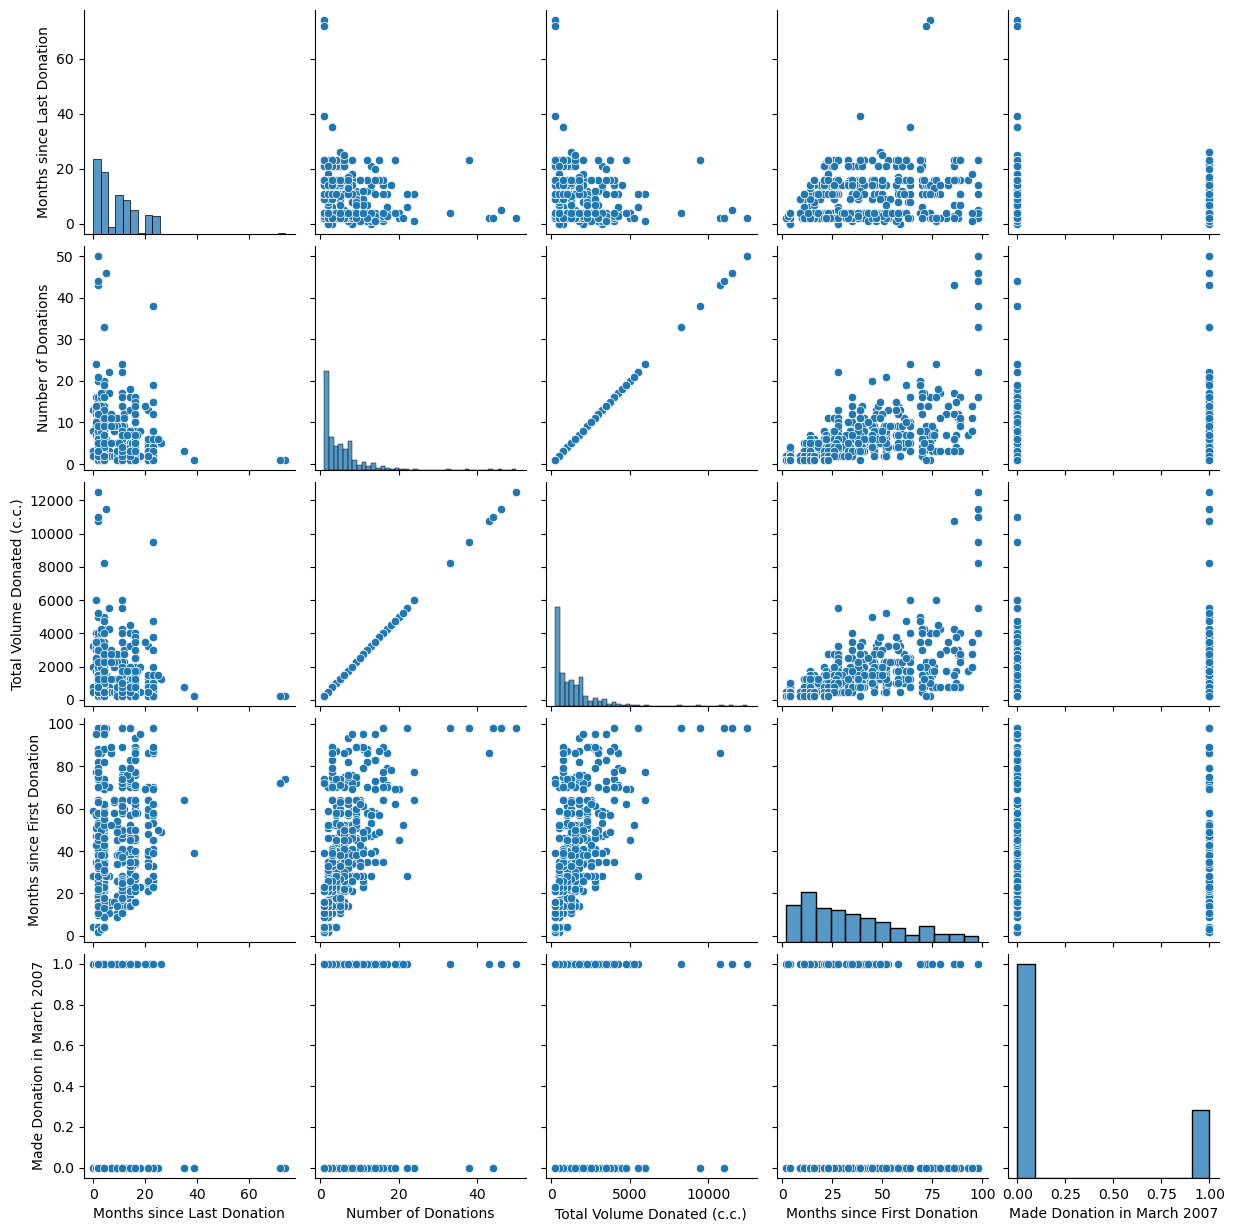

In [37]:
sns.pairplot(data)
plt.show()

#### 5.4 Correlation

In [39]:
#checking correlation for the data
data.corr()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.261234,0.220615,0.220615,-0.019819,1.000000


##### Insights:
##### 1.The distribution of data is rightly skewed.
##### 2.'Number of Donations' feature is an important predictor of whether a person will donate blood or not. 
##### 3.There is a Negative Correlation between 'Months since Last Donation' and 'Made Donation in March 2007'.This suggests that individuals who haven’t donated blood in a long time are less likely to donate in the future.
##### 4.It seems that the maximum people have donated blood in nearby 10 months.
##### 5.118 people have donated only once.

### 6.Data Preprocessing

### 6.1 Handling Missing Values

In [43]:
#checking the null values
data.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

##### Insight: There are no null values in the data.

#### 6.2 Handling Duplicates

In [46]:
#checking the duplicates 
data[data.duplicated()]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
16,2,6,1500,15,1
18,2,3,750,4,1
21,2,6,1500,16,1
27,4,10,2500,28,1
36,2,5,1250,16,0
...,...,...,...,...,...
567,23,1,250,23,0
568,23,1,250,23,0
569,23,1,250,23,0
570,23,1,250,23,0


##### Insight: There are 153 rows which are duplicated(i.e. repeating),so we have to drop that rows.


In [48]:
data.drop_duplicates(inplace=True)

In [49]:
data.duplicated().sum()
#sucessfully removed the duplicated rows

0

#### 6.3 Handling Outliers

<Axes: >

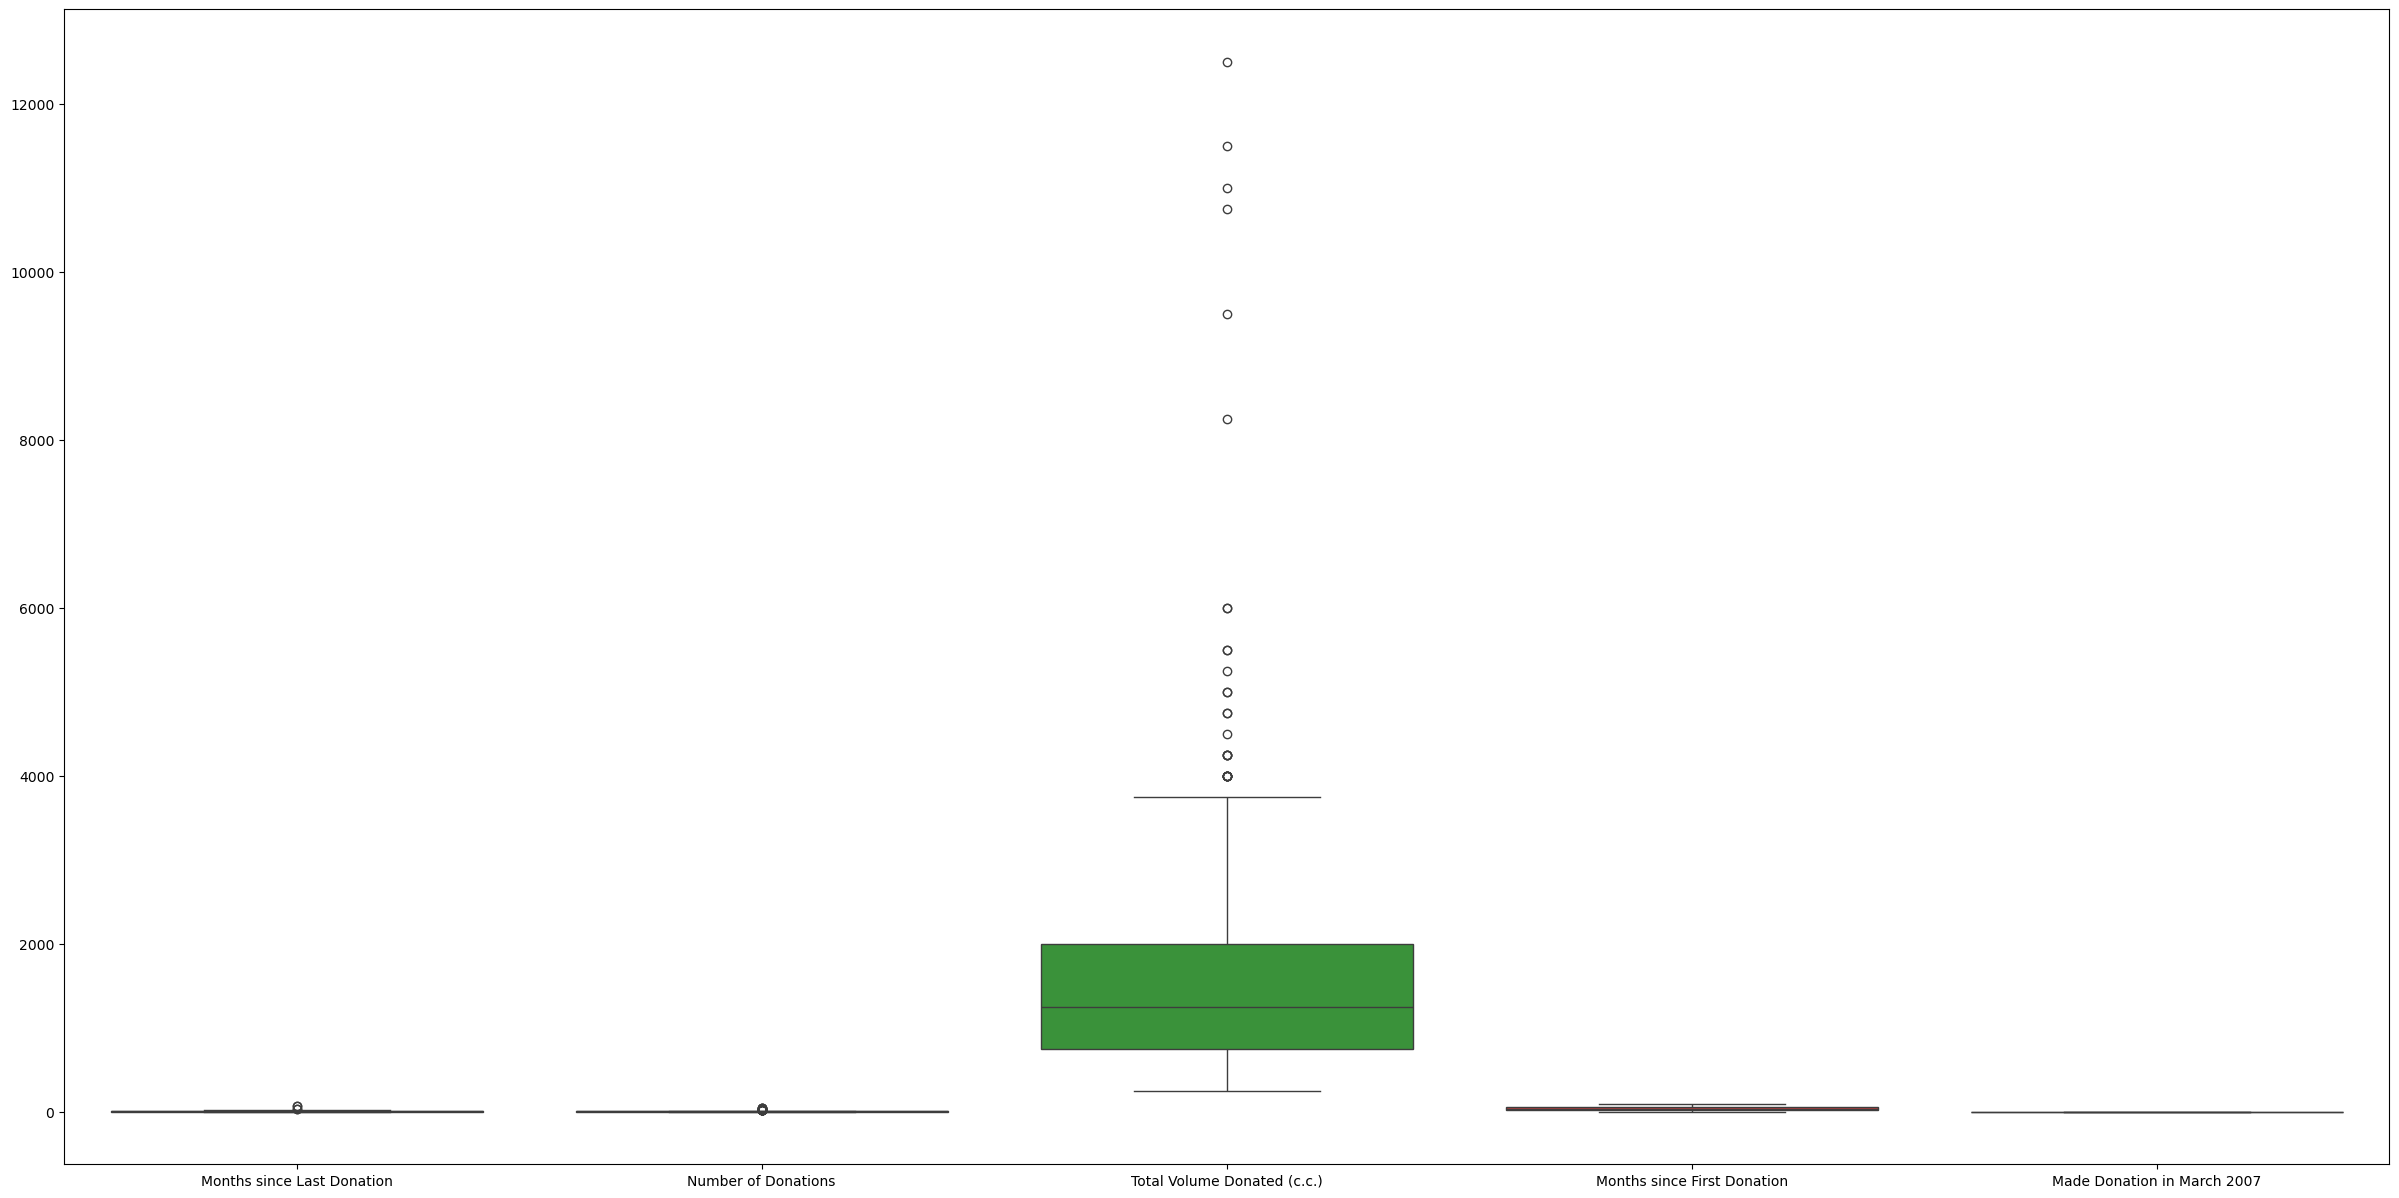

In [51]:
#checking the outliers
plt.figure(figsize=(30,15))
sns.boxplot(data)

In [52]:
#finding the limits
Q1,Q3=data['Number of Donations'].quantile([0.25,0.75])
IQR=Q3-Q1
LB=Q1-(1.5*IQR)
UB=Q3+(1.5*IQR)
print(f'Upper Bound:{UB},Lower Bound:{LB},Q1:{Q1},Q2:{IQR},Q3:{Q3}')

Upper Bound:15.5,Lower Bound:-4.5,Q1:3.0,Q2:5.0,Q3:8.0


In [53]:
#finding Outliers
Outliers=data.loc[(data['Number of Donations'] > UB)| (data['Number of Donations']< LB)]
print(f'Outliers:{len(Outliers)}')

Outliers:28


##### Insights: Despite the presence of outliers, the overall distribution of the data remains consistent. The mean and median values remain stable, indicating that the outliers do not have a significant impact on the central tendency.


In [239]:
#checking for skewness
skewness_values=data[data.columns[:-1]].skew()
print(skewness_values)

Months since Last Donation     2.493417
Number of Donations            3.369878
Total Volume Donated (c.c.)    3.369878
Months since First Donation    0.575577
dtype: float64


#### 6.4.1 Square Root Transformation

In [242]:
#for moderate skewed data
data['Months since Last Donation']=np.sqrt(data['Months since Last Donation'])

#### 6.4.2 Log Transformation

In [246]:
#for right skewed data
data[['Number of Donations','Total Volume Donated (c.c.)']]=np.log1p(data[['Number of Donations','Total Volume Donated (c.c.)']])

In [248]:
print(data[data.columns[:-1]].skew())

Months since Last Donation     0.533642
Number of Donations            0.439581
Total Volume Donated (c.c.)    0.092780
Months since First Donation    0.575577
dtype: float64


#### 6.4.3 Visualizing The Distributions

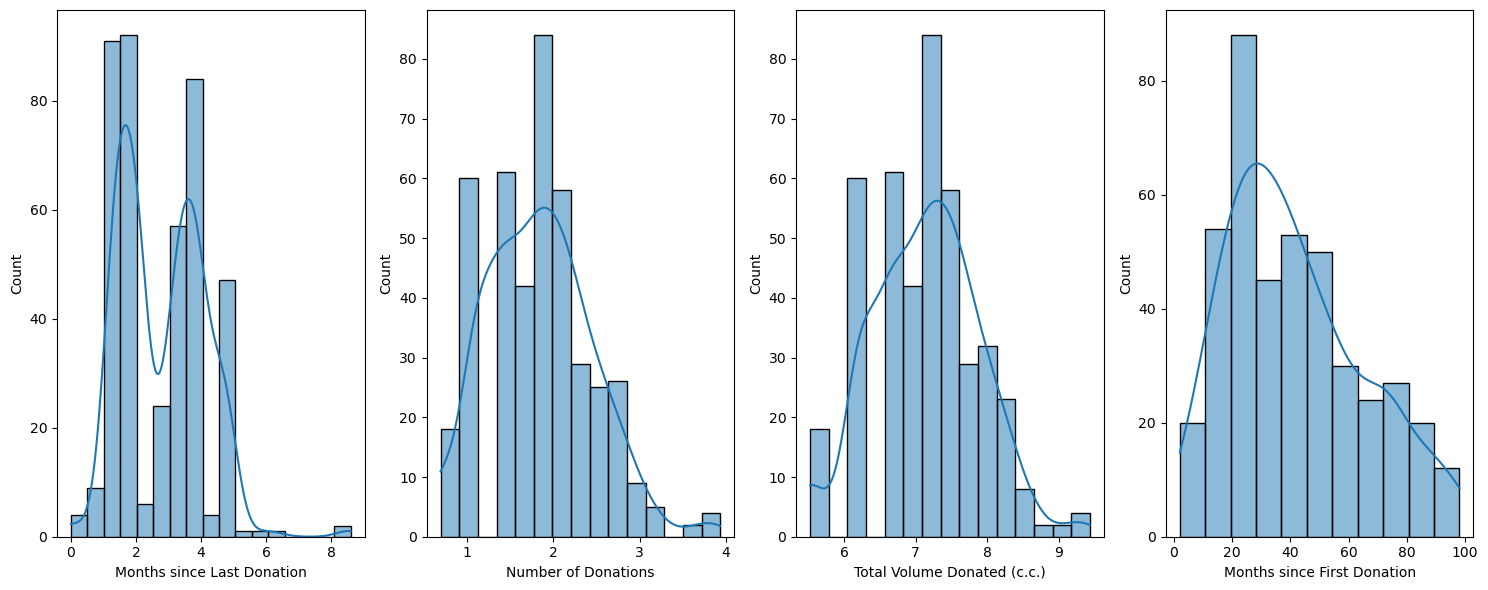

In [250]:
plt.figure(figsize=(15,6),facecolor='white')
plotnumber=1
for column in data.columns[:-1]:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.histplot(data[column],kde=True)
    plotnumber+=1
plt.tight_layout()

##### Insights:
##### 1.Checked for skewness in numerical features.
##### 2.Applied log and square root transformations to address skewness.
##### 3.After applying the transformation, the skewness of the data has decreased, indicating a more symmetric distribution.

### 6.4 Scaling

In [253]:
#extracting numerical features to scale
X=data.drop(columns=['Made Donation in March 2007'])
Y=['Made Donation in March 2007']

In [255]:
#initializing MinMaxScaler
Scaling=MinMaxScaler()

In [257]:
#Scale the features
x_scale=Scaling.fit_transform(X)
scaled_data=pd.DataFrame(x_scale,columns=X.columns)
scaled_data

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,0.164399,1.000000,1.000000,1.000000
1,0.000000,0.600835,0.655372,0.270833
2,0.116248,0.660784,0.708487,0.343750
3,0.164399,0.726029,0.765572,0.447917
4,0.116248,0.779864,0.812216,0.781250
...,...,...,...,...
418,0.557504,0.000000,0.000000,0.218750
419,0.464991,0.214022,0.280430,0.875000
420,0.532714,0.125195,0.176851,0.520833
421,0.725966,0.000000,0.000000,0.385417


### 7.Data Splitting:

In [263]:

x=scaled_data

#extracting dependent feature from the data(i.e.target column)
y=data['Made Donation in March 2007']

In [265]:
#splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=13)

### 8.Model Building

### 8.1 Logistic Regression

In [267]:
#initializing the model
LR=LogisticRegression()

#fitting the training data to the model
LR.fit(x_train,y_train)

#predicting the target for testing data
y_pred_LR=LR.predict(x_test)

In [269]:
#evaluating the model's performance by accuracy_score
Logistic_Regression_Accuracy=accuracy_score(y_test,y_pred_LR)
print(f'Accuracy_Score:{Logistic_Regression_Accuracy}')

Accuracy_Score:0.788235294117647


### 8.2 Decision Tree

In [271]:
#initializing the model
DT=DecisionTreeClassifier()

#fitting the training data to the model
DT.fit(x_train,y_train)

#predicting the target for testing data
y_pred_DT=DT.predict(x_test)

In [273]:
## Evaluating the DecisionTreeClassifier model's performance by Accuracy_Score
Accuracy_Score=accuracy_score(y_test,y_pred_DT)
print(f'Accuracy_Score:{Accuracy_Score}')

Accuracy_Score:0.6352941176470588


#### 8.2.1 Hyperparameter Tuning

In [275]:
#creating a dictionary with best parameters
params={'criterion':('gini','entropy'),
        'splitter':('best','random'),
        'max_depth':(list(range(1,10))),
        'min_samples_split':[2,3,4,5,6],
        'min_samples_leaf':(list(range(1,10)))}


In [277]:
#initializing RandomizedSearchCV
DT_CV=RandomizedSearchCV(estimator=DT,
                   param_distributions=params,
                   scoring='accuracy',
                   n_jobs=-1,
                   verbose=3,
                   cv=5
                  )   

In [279]:
#fitting the training data to the RandomizedSearchCV
DT_CV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'splitter': ('best', 'random')},
                   scoring='accuracy', verbose=3)

In [281]:
#getting best hyperparameters
print(f'Best_Params:{DT_CV.best_params_}')

Best_Params:{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'gini'}


In [283]:
#initializing DecisionTreeClassifier model
DT_Model=DecisionTreeClassifier(splitter='random', min_samples_split=5, min_samples_leaf=2, max_depth=2, criterion='gini')
#fitting the training data to the model
DT_Model.fit(x_train,y_train)

#predicting the target for testing data
pred=DT_Model.predict(x_test)

In [285]:
#Evaluating the DecisionTreeClassifier model's performance by Accuracy_Score
Decision_Tree_Accuracy=accuracy_score(y_test,pred)
print(f'Accuracy_Score:{Decision_Tree_Accuracy}')

Accuracy_Score:0.7529411764705882


### 8.3 Random Forest

In [303]:
#initializing randomforest model
RF=RandomForestClassifier()

#fitting the training data to the model
RF.fit(x_train,y_train)

#predicting the target for testing data
pred=RF.predict(x_test)

In [289]:
#evaluating the RandomForestClassifier model's performance by Accuracy_Score
acc=accuracy_score(y_test,pred)
print(f'Accuracy_Score:{acc}')

Accuracy_Score:0.7176470588235294


#### 8.3.1 Hyperparameter Tuning for RandomForest

In [291]:
#creating a dictionary with best parameters
params={'n_estimators':[100,200,300],
        'max_features':['auto','log2','sqrt'],
        'max_depth':list(range(1,11)),
        'min_samples_split':list(range(1,11)),
        'min_samples_leaf':[1,2,3,4,5]
       }

In [293]:
#initializing RandomizedSearchCV
RF_CV=RandomizedSearchCV(estimator=RF,
                   param_distributions=params,
                   scoring='accuracy',
                   cv=3,
                   verbose=3,
                   n_jobs=-1
                  )


In [305]:
#fitting the training data into RandomizedSearchCV
RF_CV.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [306]:
#getting a best hyperparameter
print(f'Best_Params:{RF_CV.best_params_}')

Best_Params:{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 9}


In [309]:
#initializing RandomForest model
#max_depth=9, max_features='sqrt', min_samples_leaf=5, min_samples_split=4, n_estimators=300
RF_Model=RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=5, min_samples_split=3, n_estimators=100)

#fitting the training data to the model
RF_Model.fit(x_train,y_train)

#predicting the target for testing data
pred=RF_Model.predict(x_test)

In [311]:
#evaluating RandomForestClassifier model's performance by Accuracy_Score
Random_Forest_Accuracy=accuracy_score(y_test,pred)
print(f'Accuracy_Score:{Random_Forest_Accuracy}')

Accuracy_Score:0.8352941176470589


### 8.4 XG Boost

In [347]:
#initializing XGBtClassifier
XGB=XGBClassifier()

#fitting the training data to the model
XGB.fit(x_train,y_train)

#predicting the target for testing data
pred_XGB=XGB.predict(x_test)

In [349]:
#evaluating the XGboostClassifier model's performance by Accuracy_Score
accuracy=accuracy_score(y_test,pred_XGB)
print(f'Accuracy_Score:{accuracy}')

Accuracy_Score:0.7058823529411765


#### 8.4.1 Hyperparameter Tuning

In [351]:
#creating a dictionary with hyperparameter
params={'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'max_depth': list(range(1,11)),
        'gamma': [0, 0.1, 0.2],
        'reg_alpha':[0.0,0.1,0.5,1.0]
       }
 

In [353]:
#initializing RandomizedSearchCV
XGB_CV=RandomizedSearchCV(estimator=XGB,
                   param_distributions=params,
                   scoring='accuracy',
                   cv=3,
                   n_jobs=-1,
                   verbose=1)

In [355]:
#fitting the training data into RandomizedSearchCV
XGB_CV.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0.0, 0.1, 0.5, 1.0]},
                   scoring='accuracy', verbose=1)

In [357]:
#getting a best hyperparameter
print(f'Best_Params:{XGB_CV.best_params_}')

Best_Params:{'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 0.1}


In [361]:
#initializing RandomForest model
XGB_Model=XGBClassifier(reg_alpha=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, n_estimators=300)

#fitting the training data to the model
XGB_Model.fit(x_train,y_train)

#predicting the target for testing data
pred_XGB_best=XGB_Model.predict(x_test)

In [363]:
#evaluating the XGboostClassifier model's performance by Accuracy_Score
XGBoost_Accuracy=accuracy_score(y_test,pred_XGB_best)
print(f'Accuracy_Score:{XGBoost_Accuracy}')

Accuracy_Score:0.8


### 8.5 Support Vector Machine(SVM)

In [419]:
#initialiazing SVC model
svc_=SVC()

#fitting the training data to the model
svc_.fit(x_train,y_train)

#predicting the target for the training data
pred_svc=svc_.predict(x_test)

In [421]:
#evaluating the SVC model's performance by Accuracy_Score
acc_svc=accuracy_score(y_test,pred_svc)
print(f'Accuracy_Score:{acc_svc}')

Accuracy_Score:0.8


#### 8.5.1 Hyperparameter Tuning

In [423]:
# Creating a dictionary with possible Hyperparameters
params={'kernel':['linear','rbf'],
        'degree':[1,2,3,4,5],
        'gamma':['scale', 'auto'],
        'C':[0.1, 1, 10, 100]
        }

In [425]:
#initializing RandomizedSearchCV
SVC_CV=RandomizedSearchCV(estimator=svc_,
                    param_distributions=params,
                    scoring='accuracy',
                    cv=5,verbose=3,
                    n_jobs=-1)

In [427]:
#fitting a training data into RandomizeddSearchCV
SVC_CV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy', verbose=3)

In [429]:
#getting a best parameter
print(f'Best Parameters:{SVC_CV.best_params_}')

Best Parameters:{'kernel': 'rbf', 'gamma': 'auto', 'degree': 5, 'C': 0.1}


In [431]:
#intializing the model
SVC_Model=SVC(C=0.1, degree=5, gamma='auto', kernel='rbf')
              
#fitting the training data to the model
SVC_Model.fit(x_train,y_train)

#predicting the target for the testing data
pred_svc_best=SVC_Model.predict(x_test)
              

In [433]:
#evaluating the SVC model's performance by Accuracy_Score
SVC_Accuracy=accuracy_score(y_test,pred_svc_best)
print(f'Accuracy_Score:{SVC_Accuracy}')

Accuracy_Score:0.7764705882352941


### 8.6 Gradient Boosting

In [403]:
#initializing the model
gbm=GradientBoostingClassifier()

#fitting the training data to the model
gbm.fit(x_train,y_train)

#predicting the target for the testing data
y_pred_gbm=gbm.predict(x_test)


In [405]:
#evaluating the target for the ttesting data
acc_gbm=accuracy_score(y_test,y_pred_gbm)
acc_gbm

0.7529411764705882

### 8.6.1 Hyperparameter Tuning

In [407]:
#Creating a dictionary with bestparameter
params={'n_estimators':[100,200,300],
        'learning_rate':[0.001,0.01,0.02,0.03,0.1],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10))}

#initializing RandomizedSearchCv
gbm_cv=RandomizedSearchCV(estimator=gbm,scoring='accuracy',param_distributions=params,cv=5,verbose=2,n_jobs=-1,n_iter=100)

#fitting a training data into RandomizedSearchCV
gbm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.02,
                                                          0.03, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=2)

In [409]:
#getting a best parameter
print(f'Best Parameters:{gbm_cv.best_params_}')

Best Parameters:{'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 1, 'learning_rate': 0.1}


In [411]:
#intializing the model
GB_Model=GradientBoostingClassifier(n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_depth=1, learning_rate=0.1)
              
#fitting the training data to the model
GB_Model.fit(x_train,y_train)

#predicting the target for the testing data
pred_gb_best=GB_Model.predict(x_test)

In [413]:
#evaluating the SVC model's performance by Accuracy_Score
Gradient_Boosting_Accuracy=accuracy_score(y_test,pred_gb_best)
print(f'Accuracy_Score:{Gradient_Boosting_Accuracy}')

Accuracy_Score:0.8235294117647058


### Model Comparison Report

In [437]:
comparison_dict = {'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBoostClassifier','SVC','GradientBoostingClassifier'],
                   'Accuracy':[Logistic_Regression_Accuracy,Decision_Tree_Accuracy,Random_Forest_Accuracy,XGBoost_Accuracy,SVC_Accuracy,Gradient_Boosting_Accuracy]
                  }
    

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df)

                        Model  Accuracy
0          LogisticRegression  0.788235
1      DecisionTreeClassifier  0.752941
2      RandomForestClassifier  0.835294
3           XGBoostClassifier  0.800000
4                         SVC  0.776471
5  GradientBoostingClassifier  0.823529


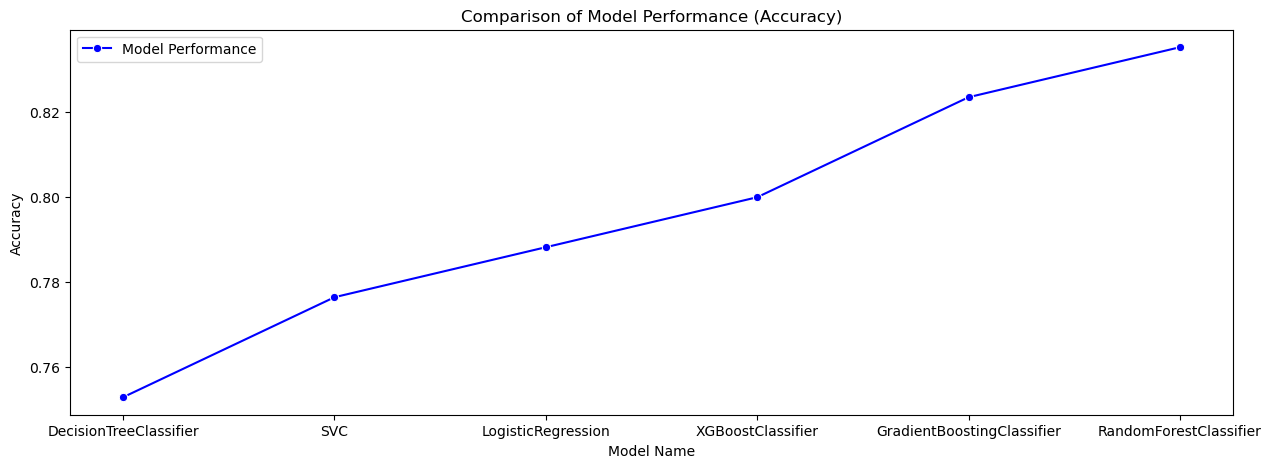

In [439]:
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=True)

max_index = comparison_df['Accuracy'].idxmax()  # This returns the row index having highest r2_score

plt.figure(figsize=(15, 5))
sns.lineplot(data=comparison_df, x='Model', y='Accuracy', marker='o', color='blue', label="Model Performance")


plt.xlabel("Model Name")
plt.ylabel("Accuracy")

plt.title("Comparison of Model Performance (Accuracy)")
plt.show()

### Conclusion

##### 1.Based on model training and evaluation, we tested several algorithms, including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier, Support Vector Classifier (SVC), and Gradient Boosting. 
##### 2.Among these, the RANDOM FOREST CLASSIFIER achieved the highest accuracy score.
##### 3.The Random Forest Classifier outperformed the other algorithms in terms of accuracy, indicating that it is the most effective model for this particular dataset.


### Report on challenges faced

##### 1.Initially it is difficult to draw insights.
##### 2.Selecting the best random state for the model is a bit tricky.
##### 3.Handling skewed data and dealing with the resulting decrease in model accuracy is quite challenging

### Project Details:
##### Project Team ID:
##### PTID-CDS-JAN-25-2365

##### Project ID:
##### PRCP-1011-BloodDonaPred

#### Team Members:
###### 1.Akshaya S.K - akshayasnowbha@gmail.com
###### 2.Rajeshwari A - rajeshwariarumugam03@gmail.com
###### 3.Unnamalai Saranya R - saranyaramesh0602@gmail.com
###### 4.Vyshnavi - vyshnavi2752@gmail.com